TASK 8 - Clustering with K means

In [28]:
#importing libraries for k means clustering
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [29]:
os.environ["OMP_NUM_THREADS"] = "1"

STEP 1- Loading dataset and visualizing dataset 


STEP 2- Fitting K-means and assigning cluster labels

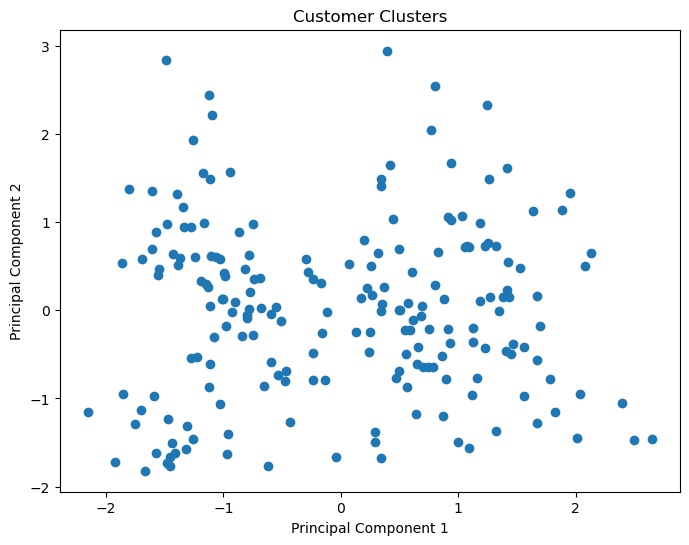

In [30]:
#loading the dataset
customers = pd.read_csv('Mall_Customers.csv')
X = customers[['Age','Annual Income (k$)','Spending Score (1-100)']]

#Scaling the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#reducing to 2d for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0],X_pca[:,1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Customer Clusters')
plt.show()


STEP 3 - Using elbow method to find optimal K

c:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows wi

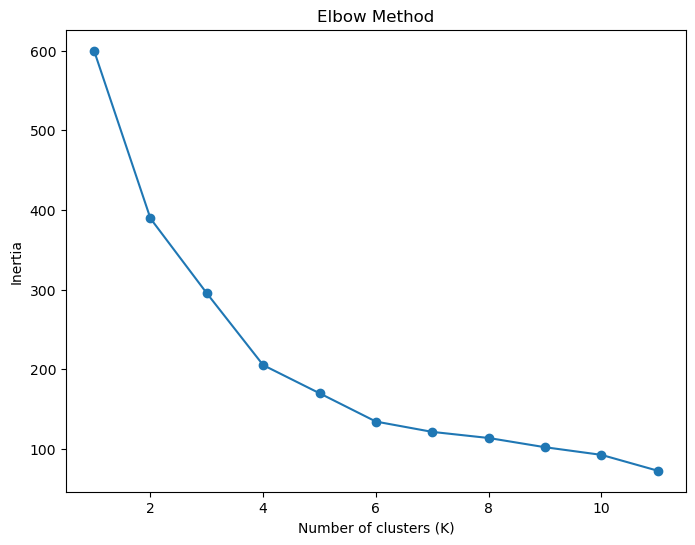

In [34]:
inertias = []
os.environ["OMP_NUM_THREADS"] = "1"
K_range = range(1, 12)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto') #using Kmeans function
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_) 

# Visualizing the Elbow Method graph using Number of clusters vs Inertia
plt.figure(figsize=(8, 6))
plt.plot(K_range, inertias, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.show()

STEP 4 - Visualizing clusters with color coding

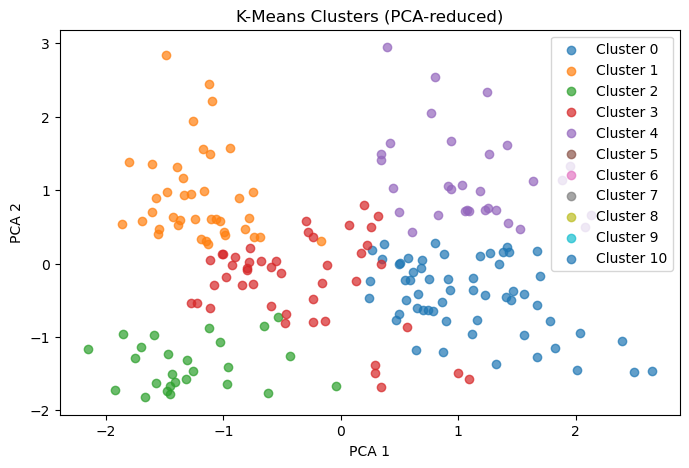

In [37]:
#Viusalizing clusters with color coding
plt.figure(figsize=(8, 5))
for cluster in range(kmeans.n_clusters):
    plt.scatter(
        X_pca[labels == cluster, 0],
        X_pca[labels == cluster, 1],
        label=f'Cluster {cluster}',
        alpha=0.7
    )
plt.title('K-Means Clusters (PCA-reduced)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.show()

STEP 5 - Evaluating clustering using Silhouette Score

In [35]:
#Silhouette Score
silhouette_avg = silhouette_score(X_scaled, kmeans.labels_)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.40861878459370105
